In [1]:
#Import all the libraries
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
#Load the dataset
#import pandas as pd
#Load data
df = pd.read_csv("heart.csv")
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [4]:
#Feature engineering of the data
#Select the top ten features based on the chi-squared test
from sklearn.feature_selection import SelectKBest,chi2
X = df.drop('target',axis=1)
y=df['target']
selector=SelectKBest(chi2,k=10)
X_new=selector.fit_transform(X,y)
selected_features=X.columns[selector.get_support()]
print('Selected Features:',selected_features)

Selected Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [5]:
#Data splitting(Actual and the predicted)
# Split the data using the normalized features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#cross validation using k-fold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

# Define the model
model = RandomForestClassifier()

# Define the k-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print('Cross Validation Score:', scores.mean())


Cross Validation Score: 0.8084153005464481


In [7]:
#Cross validation using StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define the model
model = RandomForestClassifier()

# Define the stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print('Cross Validation Score:', scores.mean())


Cross Validation Score: 0.8151366120218579


In [8]:
#Training and evaluating the model
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('test score accuracy:',accuracy_score(y_test,y_pred))

test score accuracy: 0.8360655737704918


In [10]:
# classification accuracy of the algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42) 
}


In [11]:
#Using logistic regression
# Define the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the test score accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Test Score Accuracy:', accuracy)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Logistic Regression Test Score Accuracy: 0.8852459016393442
Confusion Matrix:
[[25  4]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [12]:
#using the decision tree
# Define the model
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the test score accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Test Score Accuracy:', accuracy)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Decision Tree Test Score Accuracy: 0.7540983606557377
Confusion Matrix:
[[25  4]
 [11 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



In [ ]:
#using the random forest
# Define the model
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the test score accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Test Score Accuracy:', accuracy)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

In [ ]:
#using KNeighborsClassifier
# Define the model
# Define the model
model = KNeighborsClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the test score accuracy
accuracy = accuracy_score(y_test, y_pred)
print('K-Nearest Neighbors (KNN) Test Score Accuracy:', accuracy)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

In [13]:
#for the SVM
# Define the model
model = SVC(probability=True, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the test score accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Support Vector Machine (SVM) Test Score Accuracy:', accuracy)

# Print confusion matrix and classification report
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Support Vector Machine (SVM) Test Score Accuracy: 0.7049180327868853
Confusion Matrix:
[[15 14]
 [ 4 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



In [14]:
# evaluate the metrics
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7049180327868853


Logistic Regression Accuracy: 0.8852459016393442
Logistic Regression Precision: 0.8787878787878788
Logistic Regression Recall: 0.90625
Logistic Regression F1: 0.8923076923076924
Logistic Regression ROC AUC: 0.8841594827586207


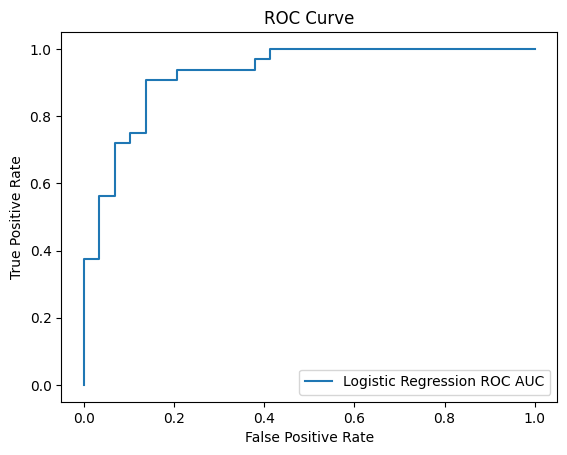

Decision Tree Accuracy: 0.7540983606557377
Decision Tree Precision: 0.84
Decision Tree Recall: 0.65625
Decision Tree F1: 0.7368421052631579
Decision Tree ROC AUC: 0.7591594827586207


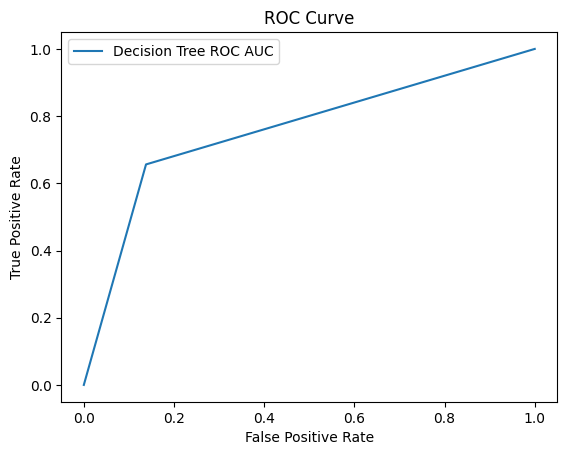

Random Forest Accuracy: 0.8360655737704918
Random Forest Precision: 0.84375
Random Forest Recall: 0.84375
Random Forest F1: 0.84375
Random Forest ROC AUC: 0.8356681034482758


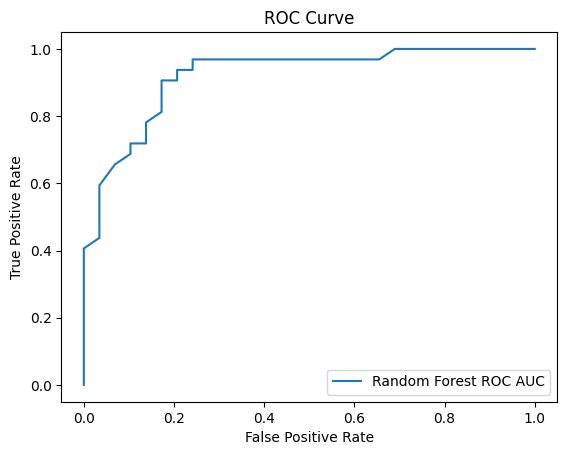

KNN Accuracy: 0.6885245901639344
KNN Precision: 0.6857142857142857
KNN Recall: 0.75
KNN F1: 0.7164179104477612
KNN ROC AUC: 0.6853448275862069


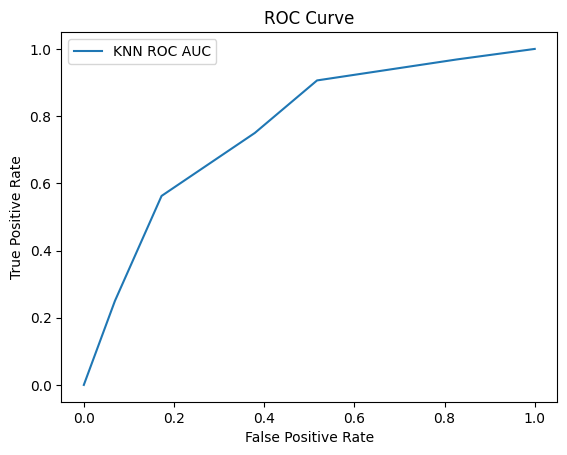

SVM Accuracy: 0.7049180327868853
SVM Precision: 0.6666666666666666
SVM Recall: 0.875
SVM F1: 0.7567567567567568
SVM ROC AUC: 0.6961206896551724


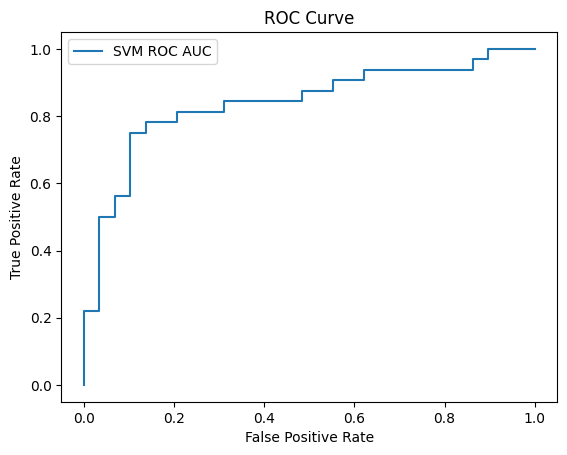

In [16]:
            
       
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Example metrics dictionary
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}


# Classification Accuracy of the Algorithms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42) 
}

# Evaluate the metrics

metrics = {
    'Accuracy' : accuracy_score,
    'Precision' : precision_score,
    'Recall' : recall_score,
    'F1' : f1_score,
    'ROC AUC' : roc_auc_score
}

# train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
# Calculate metrics
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        print(f'{model_name} {metric_name}: {metric_value}')
        
        if metric_name == 'ROC AUC':
            fpr, tpr, _= roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f'{model_name} ROC AUC')
            
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend()
            plt.show()




In [ ]:
#Actionable insight of the models
#Logistic Regression: 0.8852459016393442
# Decision Tree : 0.7540983606557377
# K-Nearest Neighbors (KNN) : 0.6885245901639344
# Support Vector Machine (SVM) : 0.7049180327868853
# Random Forest : 0.8360655737704918




In [ ]:
#Conclusion
# logistic regression is the best performer model with highest score metrics

In [ ]:
#Recommendation
 # I recommend Logistic regression model for deployment
    